In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('hotel_bookings.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
data.shape

(119390, 32)

In [6]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

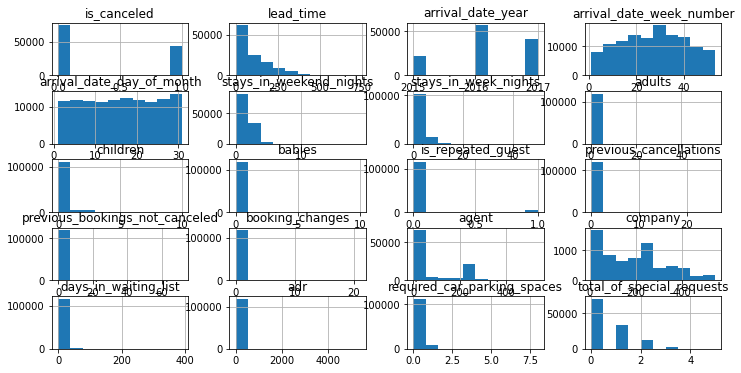

In [8]:
data.hist(figsize=(12,6))
plt.show();

<AxesSubplot:xlabel='children', ylabel='company'>

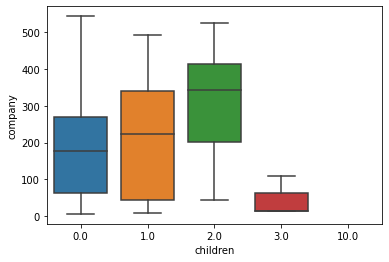

In [9]:
sns.boxplot(x='children',y='company',data=data)

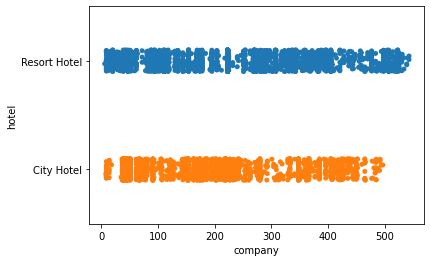

In [10]:
sns.stripplot(x='company',y='hotel',data=data);

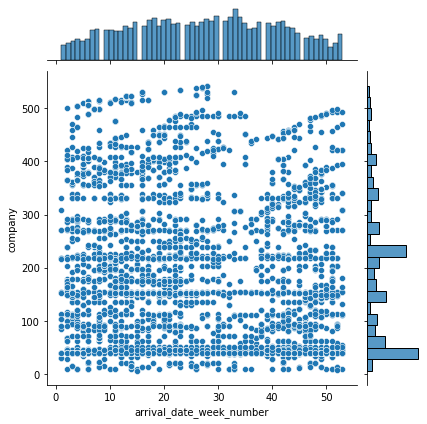

In [11]:
sns.jointplot(x='arrival_date_week_number',y='company',data=data)

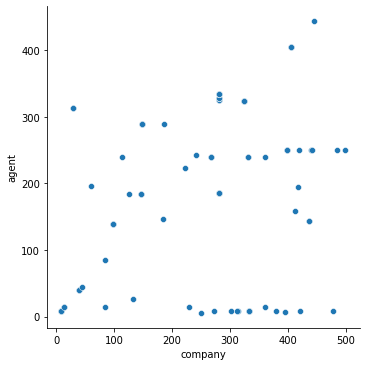

In [12]:
sns.relplot(x='company',y='agent',data=data);

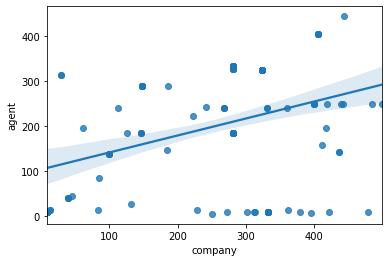

In [13]:
sns.regplot(x='company',y='agent',data=data);

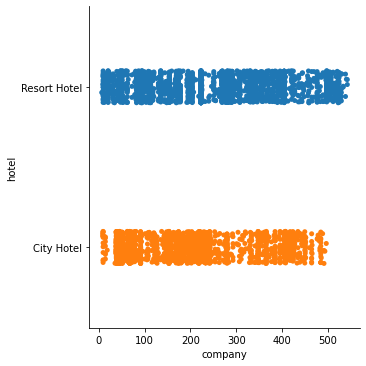

In [14]:
sns.catplot(x='company',y='hotel',data=data)

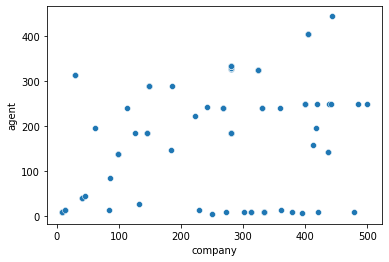

In [15]:
sns.scatterplot(x='company',y='agent',data=data);

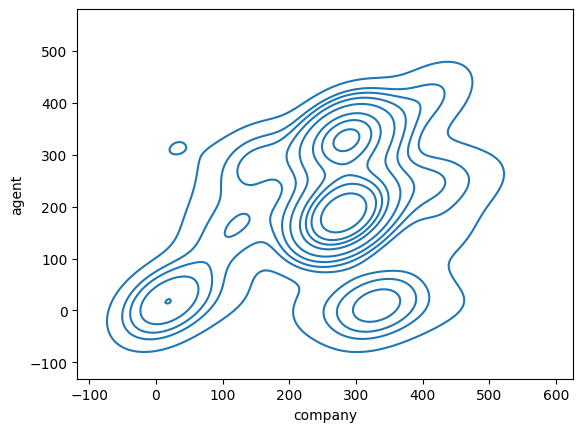

In [16]:
plt.style.use("default")
sns.kdeplot(x='company',y='agent',data=data);

<AxesSubplot:xlabel='company', ylabel='hotel'>

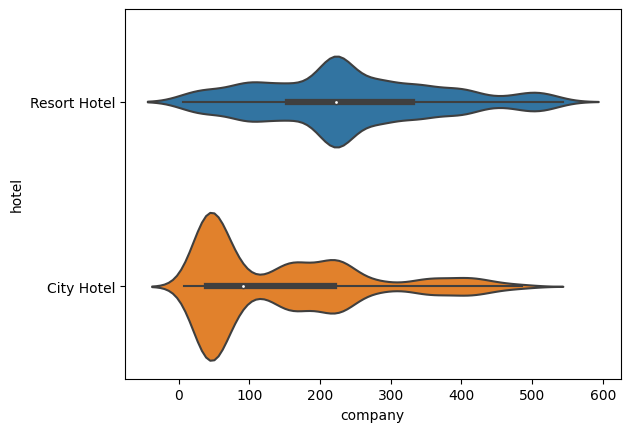

In [17]:
sns.violinplot(x='company',y='hotel',data=data)

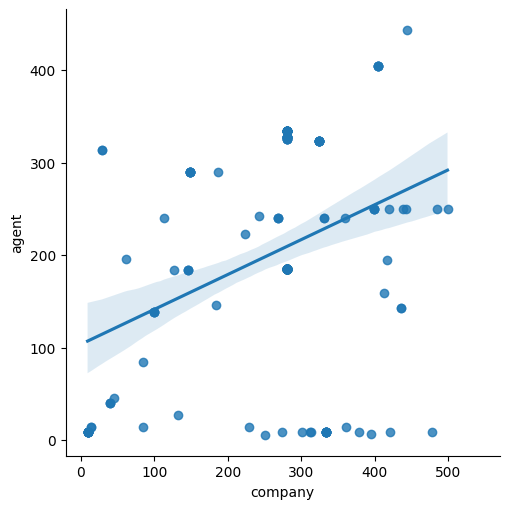

In [18]:
sns.lmplot(x='company',y='agent',data=data);

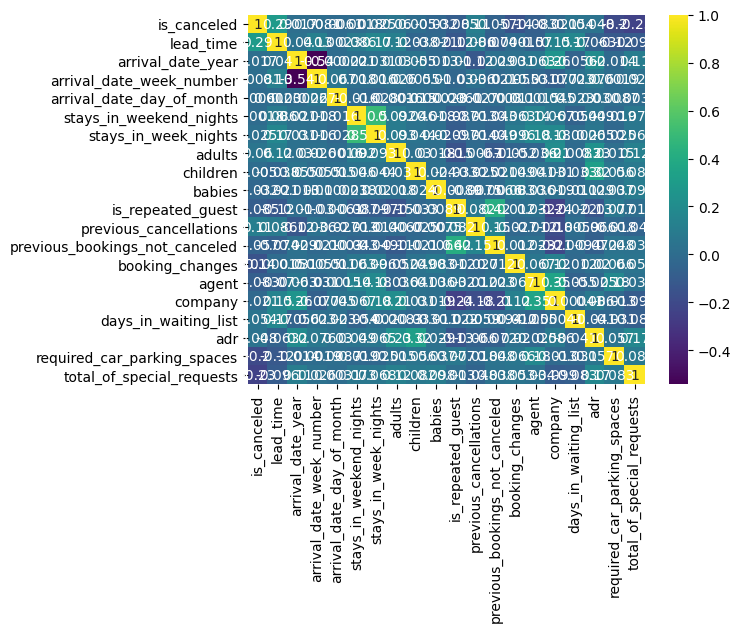

In [19]:
sns.heatmap(data.corr(),annot=True,cmap='viridis');

In [20]:
data=data.drop(['country','agent','company'],axis=1)
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [21]:
data=data.dropna()

In [22]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [23]:
data.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [24]:
data.deposit_type.unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [25]:
data.arrival_date_month.unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [31]:
list1=list(data.columns)
list1

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [27]:
list_categorical=[]
for i in list1:
    if data[i].dtype=='object':
        list_categorical.append(i)

In [28]:
list_categorical

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [33]:
for i in list_categorical:
    data[i]=le.fit_transform(data[i])

In [34]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,...,2,3,0,0,2,0.0,0,0,1,121
1,1,0,737,2015,5,27,1,0,0,2,...,2,4,0,0,2,0.0,0,0,1,121
2,1,0,7,2015,5,27,1,0,1,1,...,2,0,0,0,2,75.0,0,0,1,122
3,1,0,13,2015,5,27,1,0,1,1,...,0,0,0,0,2,75.0,0,0,1,122
4,1,0,14,2015,5,27,1,0,2,2,...,0,0,0,0,2,98.0,0,1,1,123


In [38]:
X=data.drop('hotel',axis=1)
y=data['hotel']

TRAINING AND TESTING DATA

In [39]:
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=0,test_size=0.2)

In [40]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

95508
23878
95508
23878


# MODELS

Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
reg= LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression()

In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
y_pred_reg= reg.predict(X_test)
acc_reg=accuracy_score(y_test,y_pred_reg)
print("Classification report is :\n",classification_report(y_test,y_pred_reg))
print("Confusion matrix :\n",confusion_matrix(y_test,y_pred_reg))
print("Training Score: \n",reg.score(X_train,y_train)*100)
print(f"Accuracy Score of Logistic Regression is: {acc_reg*100}")

Classification report is :
               precision    recall  f1-score   support

           0       0.77      0.91      0.83     15891
           1       0.70      0.45      0.55      7987

    accuracy                           0.75     23878
   macro avg       0.73      0.68      0.69     23878
weighted avg       0.75      0.75      0.74     23878

Confusion matrix :
 [[14388  1503]
 [ 4408  3579]]
Training Score: 
 75.47954098086024
Accuracy Score of Logistic Regression is: 75.24499539324901


KNeighborsClassifier

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)

y_pred_knn=knn.predict(X_test)
acc_knn=accuracy_score(y_test,y_pred_knn)
conf=confusion_matrix(y_test,y_pred_knn)
clf_report=classification_report(y_test,y_pred_knn)

print(f"Accuracy Score of KNN is:{acc_knn*100}")
print(f"Confusion Matrix : \n {conf}")
print(f"Classification report :\n {clf_report}")

Accuracy Score of KNN is:88.18996565876539
Confusion Matrix : 
 [[14897   994]
 [ 1826  6161]]
Classification report :
               precision    recall  f1-score   support

           0       0.89      0.94      0.91     15891
           1       0.86      0.77      0.81      7987

    accuracy                           0.88     23878
   macro avg       0.88      0.85      0.86     23878
weighted avg       0.88      0.88      0.88     23878



DECISION TREE CLASSIFIER

In [51]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth=6,random_state=123,criterion='entropy')

dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [53]:
y_pred_tree=dtree.predict(X_test)
conf=print(confusion_matrix(y_test,y_pred_tree))
clf=print(classification_report(y_test,y_pred_tree))
score=accuracy_score(y_test,y_pred_tree)*100
score

[[14919   972]
 [ 2448  5539]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     15891
           1       0.85      0.69      0.76      7987

    accuracy                           0.86     23878
   macro avg       0.85      0.82      0.83     23878
weighted avg       0.86      0.86      0.85     23878



85.67719239467291

Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [55]:
y_pred_rfc=rfc.predict(X_test)
conf=print(confusion_matrix(y_test,y_pred_rfc))
clf=print(classification_report(y_test,y_pred_rfc))
score=accuracy_score(y_test,y_pred_rfc)*100
score

[[15566   325]
 [  492  7495]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     15891
           1       0.96      0.94      0.95      7987

    accuracy                           0.97     23878
   macro avg       0.96      0.96      0.96     23878
weighted avg       0.97      0.97      0.97     23878



96.57844040539409

AdaBoostClassifier

In [56]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier(base_estimator=None)
adb.fit(X_train,y_train)

AdaBoostClassifier()

In [59]:
y_pred_ada=adb.predict(X_test)
conf =print(confusion_matrix(y_test, y_pred_ada))
clf =print(classification_report(y_test, y_pred_ada))
score=accuracy_score(y_test,y_pred_ada)*100
score

[[14867  1024]
 [ 2121  5866]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.90     15891
           1       0.85      0.73      0.79      7987

    accuracy                           0.87     23878
   macro avg       0.86      0.84      0.85     23878
weighted avg       0.87      0.87      0.87     23878



86.8288801407153

Gradient Boosting Classifier

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [61]:
y_pred_gbc=gbc.predict(X_test)
conf =print(confusion_matrix(y_test, y_pred_gbc))
clf =print(classification_report(y_test, y_pred_gbc))
score=accuracy_score(y_test,y_pred_gbc)*100
score

[[15217   674]
 [ 1601  6386]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     15891
           1       0.90      0.80      0.85      7987

    accuracy                           0.90     23878
   macro avg       0.90      0.88      0.89     23878
weighted avg       0.90      0.90      0.90     23878



90.47240137364938

XGBClassifier

In [62]:
from xgboost import XGBClassifier
xgb=XGBClassifier(objective='reg:linear',colsample_tree=0.3,learning_rate=0.1,
                  max_depth=5,alpha=10,n_estimators=10)
xgb.fit(X_train,y_train)

[11:22:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[11:22:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_tree" } are not used.



XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, colsample_tree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None, ...)

In [63]:
y_pred_xgb= xgb.predict(X_test)
conf =print(confusion_matrix(y_test, y_pred_xgb))
clf =print(classification_report(y_test, y_pred_xgb))
score=accuracy_score(y_test,y_pred_xgb)*100
score

[[14980   911]
 [ 2194  5793]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.91     15891
           1       0.86      0.73      0.79      7987

    accuracy                           0.87     23878
   macro avg       0.87      0.83      0.85     23878
weighted avg       0.87      0.87      0.87     23878



86.99639835832147

ExtraTreesClassifier

In [65]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier(n_estimators=100,random_state=0)
etc.fit(X_train,y_train)

ExtraTreesClassifier(random_state=0)

In [66]:
y_pred_etc=etc.predict(X_test)
conf =print(confusion_matrix(y_test, y_pred_etc))
clf =print(classification_report(y_test, y_pred_etc))
score=accuracy_score(y_test,y_pred_etc)*100
score

[[15526   365]
 [  542  7445]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     15891
           1       0.95      0.93      0.94      7987

    accuracy                           0.96     23878
   macro avg       0.96      0.95      0.96     23878
weighted avg       0.96      0.96      0.96     23878



96.20152441578021

In [69]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model= BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(X_train,y_train)
model.score(X_test,y_test)*100

95.85392411424742

In [70]:
data=pd.DataFrame({'Actual':y_test,'Predicted':y_pred_rfc})
data

,Actual,Predicted
117018,0,0
107541,0,0
56907,0,0
26114,1,1
42024,0,0
...,...,...
55160,0,0
78598,0,0
98604,0,0
64854,0,0


# Conclusion

We got an accuracy of 96.6% using Random Forest Classifier, which is the hightest among all the models.